In [1]:
import numpy as np
import natsort
import cv2
import os
import matplotlib.pyplot as plt

from google.colab import drive
from glob import glob

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def sortlist(filelist):
    filelist = natsort.natsorted(filelist)
    return filelist

In [22]:
class image_labeling():

    def __init__(self, rgb_img_path, save_path):
        self.rgb_img_path = rgb_img_path
        self.save_path = save_path

        self.make_rgb2label(self.rgb_img_path)

    def make_rgb2label(self, path):

        img_num = 1
        patch_num = 0


        r = np.array([255, 0, 0])
        g = np.array([0, 255, 0])
        y = np.array([255, 255, 0])

        for file_path in path:
            if patch_num == 25:
                print(img_num, "번째 label data 생성 완료. . .")
                patch_num = 0
                img_num += 1

            patch_num += 1

            label_img = cv2.imread(file_path)
            label_img = cv2.cvtColor(label_img, cv2.COLOR_BGR2RGB)
            
            label_seg = np.zeros((label_img.shape[:2]), dtype=np.int)
            label_seg[(label_img==r).all(axis=2)] = 50
            label_seg[(label_img==g).all(axis=2)] = 30
            label_seg[(label_img==y).all(axis=2)] = 10
            
            label_seg_path = self.save_path + f'/img{img_num}_{patch_num}.png'

            label_seg = label_seg[:,:, np.newaxis]

            cv2.imwrite(label_seg_path, label_seg)
        print("label 작업 완료!")



---
#Main Code

In [5]:
train_dir_path = '/content/drive/MyDrive/Cloud_data/cloud_train/'

train_label_file_path = os.path.join(train_dir_path,'patch_label')
train_label_save_path = os.path.join(train_dir_path,'patch_labeling')

In [6]:
train_label_file_list = glob(os.path.join(train_label_file_path,"*png"))

In [7]:
train_label_file_list = sortlist(train_label_file_list)

In [8]:
train_label_file_list[:10]

['/content/drive/MyDrive/Cloud_data/cloud_train/patch_label/img1_1.png',
 '/content/drive/MyDrive/Cloud_data/cloud_train/patch_label/img1_2.png',
 '/content/drive/MyDrive/Cloud_data/cloud_train/patch_label/img1_3.png',
 '/content/drive/MyDrive/Cloud_data/cloud_train/patch_label/img1_4.png',
 '/content/drive/MyDrive/Cloud_data/cloud_train/patch_label/img1_5.png',
 '/content/drive/MyDrive/Cloud_data/cloud_train/patch_label/img1_6.png',
 '/content/drive/MyDrive/Cloud_data/cloud_train/patch_label/img1_7.png',
 '/content/drive/MyDrive/Cloud_data/cloud_train/patch_label/img1_8.png',
 '/content/drive/MyDrive/Cloud_data/cloud_train/patch_label/img1_9.png',
 '/content/drive/MyDrive/Cloud_data/cloud_train/patch_label/img1_10.png']

In [9]:
label_img = cv2.imread(train_label_file_list[1])

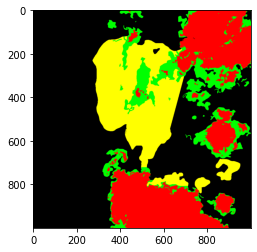

In [10]:
label_img = cv2.cvtColor(label_img, cv2.COLOR_BGR2RGB)
plt.imshow(label_img); plt.show()

빨강 : 짙은 구름   
초록 : 옅은 구름  
노랑 : 그림자(빨강 + 초록) 


짙은 구름 : 1  
옅은 구름 : 2  
그림자 : 3  

In [12]:
run = image_labeling(train_label_file_list, train_label_save_path)

1 번째 label data 생성 완료. . .
2 번째 label data 생성 완료. . .
3 번째 label data 생성 완료. . .
4 번째 label data 생성 완료. . .
5 번째 label data 생성 완료. . .
6 번째 label data 생성 완료. . .
7 번째 label data 생성 완료. . .
8 번째 label data 생성 완료. . .
9 번째 label data 생성 완료. . .
10 번째 label data 생성 완료. . .
11 번째 label data 생성 완료. . .
12 번째 label data 생성 완료. . .
13 번째 label data 생성 완료. . .
14 번째 label data 생성 완료. . .
15 번째 label data 생성 완료. . .
16 번째 label data 생성 완료. . .
17 번째 label data 생성 완료. . .
18 번째 label data 생성 완료. . .
19 번째 label data 생성 완료. . .
20 번째 label data 생성 완료. . .
21 번째 label data 생성 완료. . .
22 번째 label data 생성 완료. . .
23 번째 label data 생성 완료. . .
24 번째 label data 생성 완료. . .
25 번째 label data 생성 완료. . .
26 번째 label data 생성 완료. . .
27 번째 label data 생성 완료. . .
28 번째 label data 생성 완료. . .
29 번째 label data 생성 완료. . .
30 번째 label data 생성 완료. . .
31 번째 label data 생성 완료. . .
32 번째 label data 생성 완료. . .
33 번째 label data 생성 완료. . .
34 번째 label data 생성 완료. . .
35 번째 label data 생성 완료. . .
36 번째 label data 생성 완료. . .
3

In [20]:
test_patch_img = cv2.imread(train_dir_path + 'patch_img/img1_2.png')
test_label_img = cv2.imread(train_dir_path + 'patch_labeling/img1_2.png')

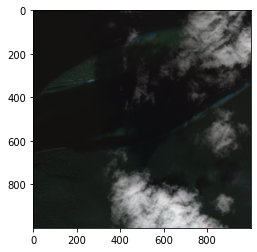

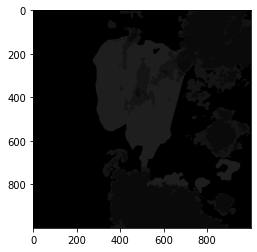

In [21]:
plt.imshow(test_patch_img); plt.show()
plt.imshow(test_label_img); plt.show()